In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from geopandas.tools import sjoin
from shapely.geometry import Point, mapping,shape

In [2]:
tracts = gpd.GeoDataFrame.from_file('New Shapefile/NYC Tracts WGS84.shp')

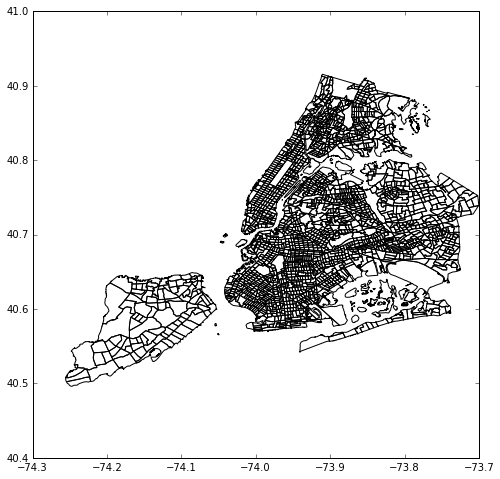

In [3]:
plt.figure(figsize = (10,8))
tracts.plot(alpha=0)

In [4]:
tracts.head(2)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.016794,POLYGON ((-74.07920577013246 40.64343078374567...
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4954936.20677,10582.855371,POLYGON ((-74.11618948681574 40.62894119692049...


In [49]:
len(tracts)

2166

In [5]:
data = pd.read_csv('311_2014.csv')

/opt/rh/anaconda/root/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (8,17,18,21,38,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [6]:
len(data)

1837057

In [10]:
data = data.dropna(axis=0, how='any', thresh=None, subset=['Latitude', 'Longitude'], inplace=False)

In [11]:
len(data)

1674072

In [13]:
data['geometry'] = data.apply(lambda z: Point(z.Longitude, z.Latitude), axis=1)

In [14]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,geometry
0,28457271,07/11/2014 03:08:58 PM,08/05/2014 12:41:37 PM,DOT,Department of Transportation,Sidewalk Condition,Defacement,Sidewalk,11368,37-73 104 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.751870,-73.862718,"(40.75187005911849, -73.8627181241703)",POINT (-73.8627181241703 40.75187005911849)
1,28644314,08/08/2014 02:06:22 PM,08/12/2014 11:33:34 AM,DCA,Department of Consumer Affairs,Consumer Complaint,False Advertising,NaN,10014,113 WASHINGTON PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.732623,-74.001119,"(40.732623326327484, -74.0011185474772)",POINT (-74.0011185474772 40.73262332632749)
2,27756168,03/31/2014 09:01:02 AM,04/02/2014 11:33:42 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Damaged/Defective Goods,NaN,11434,168-07 BAISLEY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.680273,-73.775359,"(40.680272744251745, -73.77535902034259)",POINT (-73.77535902034259 40.68027274425175)
3,29306886,11/18/2014 12:52:40 AM,11/18/2014 01:35:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11358,42-10 159 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.760384,-73.806826,"(40.76038370367052, -73.80682559743896)",POINT (-73.80682559743896 40.76038370367053)
4,29312885,11/17/2014 07:09:00 AM,11/17/2014 12:00:00 PM,DSNY,BCC - Brooklyn South,Derelict Vehicles,14 Derelict Vehicles,Street,11234,1616 TROY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.632958,-73.934202,"(40.6329583052909, -73.9342015280237)",POINT (-73.93420152802371 40.6329583052909)


In [15]:
PointsGeodataframe = gpd.GeoDataFrame(data)

In [16]:
PointsGeodataframe.crs = tracts.crs

In [17]:
merged=sjoin(PointsGeodataframe, tracts, how='left', op='within')

In [18]:
merged.columns

Index([                    u'Unique Key',                   u'Created Date',
                          u'Closed Date',                         u'Agency',
                          u'Agency Name',                 u'Complaint Type',
                           u'Descriptor',                  u'Location Type',
                         u'Incident Zip',               u'Incident Address',
                          u'Street Name',                 u'Cross Street 1',
                       u'Cross Street 2',          u'Intersection Street 1',
                u'Intersection Street 2',                   u'Address Type',
                                 u'City',                       u'Landmark',
                        u'Facility Type',                         u'Status',
                             u'Due Date',         u'Resolution Description',
       u'Resolution Action Updated Date',                u'Community Board',
                              u'Borough',     u'X Coordinate (State Plane)',

In [22]:
merged['Agency'].value_counts().nlargest(10)

HPD      611444
NYPD     271143
DOT      238252
DEP      161497
DSNY     138162
DOB       87828
DPR       62354
DOHMH     52628
TLC       19622
DCA       16853
dtype: int64

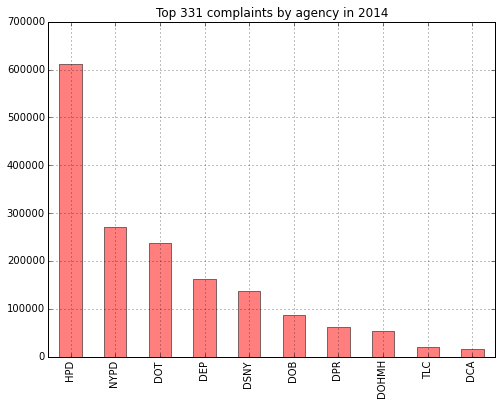

In [98]:
merged['Agency'].value_counts().nlargest(10).plot(kind='bar', grid=True, alpha=0.5, figsize=(8,6), color='red',\
                                                  title='Top 331 complaints by agency in 2014') 

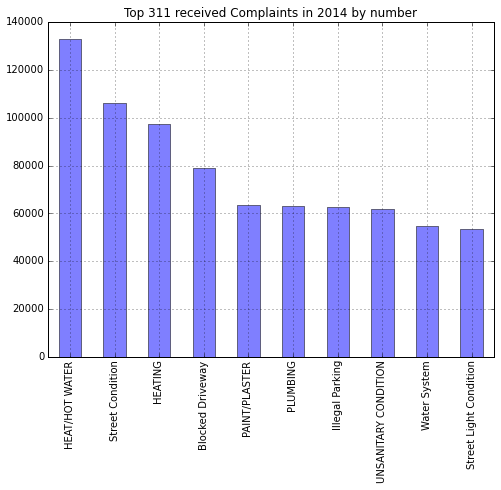

In [99]:
merged['Complaint Type'].value_counts().nlargest(10).plot(kind='bar', grid=True, alpha=0.5, figsize=(8,6), \
                                                         title="Top 311 received Complaints in 2014 by number") 

In [38]:
topct = pd.DataFrame(merged['Complaint Type'].groupby(merged['BoroCT2010']).value_counts().groupby(level=0).nlargest(1)).reset_index()

In [40]:
topct.columns = ['BoroCT2010', 'uno', 'Complaint Type', 'Count']

In [43]:
del(topct['uno'])

In [45]:
topct.head()

,BoroCT2010,Complaint Type,Count
0,1000201,HEAT/HOT WATER,68
1,1000202,HEAT/HOT WATER,61
2,1000500,Noise - Street/Sidewalk,2
3,1000600,Illegal Parking,106
4,1000700,Noise,314


In [46]:
geotopct = pd.merge(tracts, topct, on='BoroCT2010')

In [48]:
len(geotopct)

2162

In [50]:
geotopct.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,Complaint Type,Count
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.016794,POLYGON ((-74.07920577013246 40.64343078374567...,HEAT/HOT WATER,59
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4954936.20677,10582.855371,POLYGON ((-74.11618948681574 40.62894119692049...,Street Condition,116
2,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5788237.74119,9902.948235,"POLYGON ((-74.05974734759452 40.5938486115672,...",Street Condition,85
3,1003200,1,Manhattan,I,003200,32,MN22,East Village,3809,2334190.23228,6358.386684,POLYGON ((-73.97990650235906 40.72686577300234...,Noise - Commercial,245
4,1009600,1,Manhattan,E,009600,96,MN17,Midtown-Midtown South,3807,1887288.40108,5737.356247,POLYGON ((-73.97765482727571 40.75791142377998...,Broken Muni Meter,106


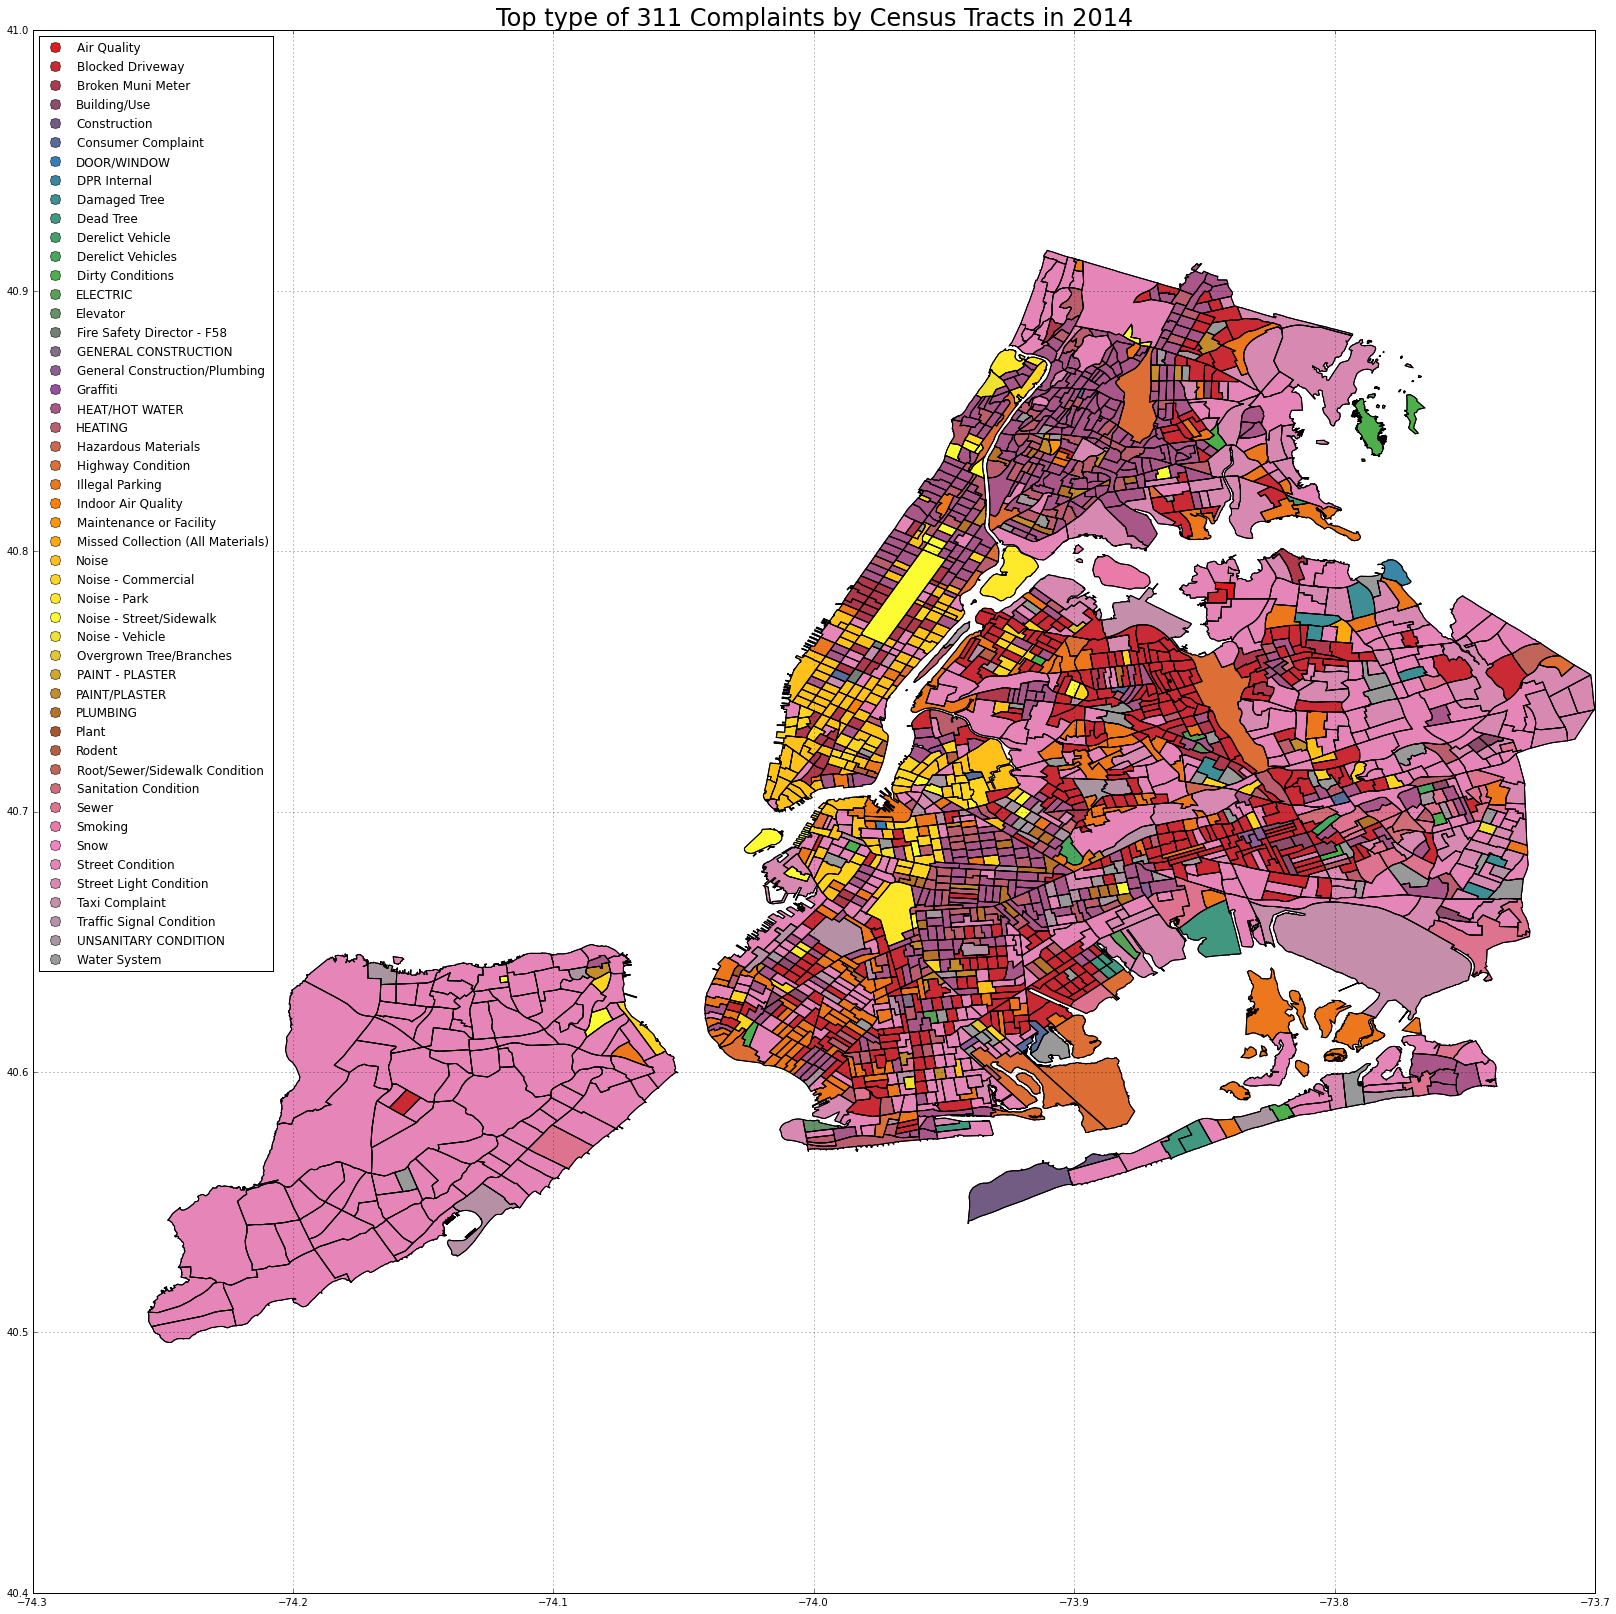

In [95]:
plt.figure(figsize = (28,50))
geotopct.plot(column='Complaint Type', alpha=1, legend=True)
plt.title("Top type of 311 Complaints by Census Tracts in 2014", fontsize=24)
plt.grid()

In [143]:
mergedhh = merged[merged['Complaint Type']=='HEAT/HOT WATER']

In [117]:
tophh = pd.DataFrame(mergedhh['Complaint Type'].groupby(mergedhh['BoroCT2010']).value_counts()).reset_index()

In [121]:
tophh.columns = [['BoroCT2010', 'Complaint Type', 'Count']]

In [122]:
geotophh = pd.merge(tracts, tophh, on='BoroCT2010')

In [123]:
geotophh.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,Complaint Type,Count
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.016794,POLYGON ((-74.07920577013246 40.64343078374567...,HEAT/HOT WATER,59
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4954936.20677,10582.855371,POLYGON ((-74.11618948681574 40.62894119692049...,HEAT/HOT WATER,11
2,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5788237.74119,9902.948235,"POLYGON ((-74.05974734759452 40.5938486115672,...",HEAT/HOT WATER,19
3,1003200,1,Manhattan,I,003200,32,MN22,East Village,3809,2334190.23228,6358.386684,POLYGON ((-73.97990650235906 40.72686577300234...,HEAT/HOT WATER,148
4,1009600,1,Manhattan,E,009600,96,MN17,Midtown-Midtown South,3807,1887288.40108,5737.356247,POLYGON ((-73.97765482727571 40.75791142377998...,HEAT/HOT WATER,5


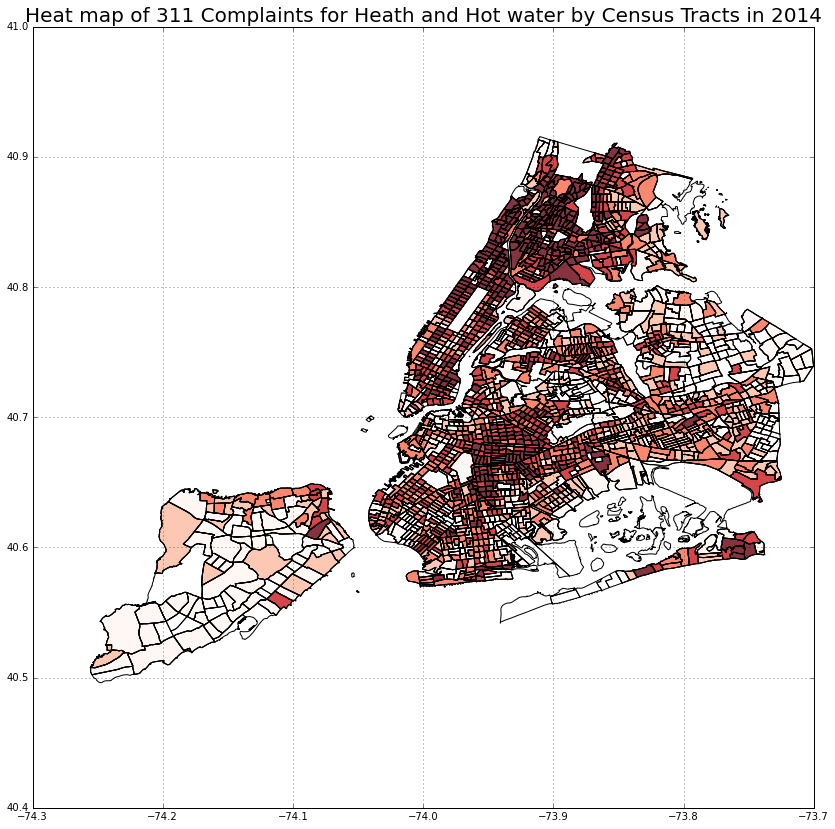

In [140]:
plt.figure(figsize = (14,25))
geotophh.plot(column='Count', alpha=0.8, scheme = 'QUANTILES', colormap='Reds')
tracts.plot(alpha=0)
plt.title("Heat map of 311 Complaints for Heath and Hot water by Census Tracts in 2014", fontsize=20)
plt.grid()

In [142]:
mergedsc = merged[merged['Complaint Type']=='Street Condition']

In [144]:
topsc = pd.DataFrame(mergedsc['Complaint Type'].groupby(mergedsc['BoroCT2010']).value_counts()).reset_index()

In [145]:
topsc.columns = [['BoroCT2010', 'Complaint Type', 'Count']]

In [146]:
geotopsc = pd.merge(tracts, topsc, on='BoroCT2010')

In [147]:
geotopsc.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,Complaint Type,Count
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.016794,POLYGON ((-74.07920577013246 40.64343078374567...,Street Condition,32
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4954936.20677,10582.855371,POLYGON ((-74.11618948681574 40.62894119692049...,Street Condition,116
2,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5788237.74119,9902.948235,"POLYGON ((-74.05974734759452 40.5938486115672,...",Street Condition,85
3,1003200,1,Manhattan,I,003200,32,MN22,East Village,3809,2334190.23228,6358.386684,POLYGON ((-73.97990650235906 40.72686577300234...,Street Condition,73
4,1009600,1,Manhattan,E,009600,96,MN17,Midtown-Midtown South,3807,1887288.40108,5737.356247,POLYGON ((-73.97765482727571 40.75791142377998...,Street Condition,68


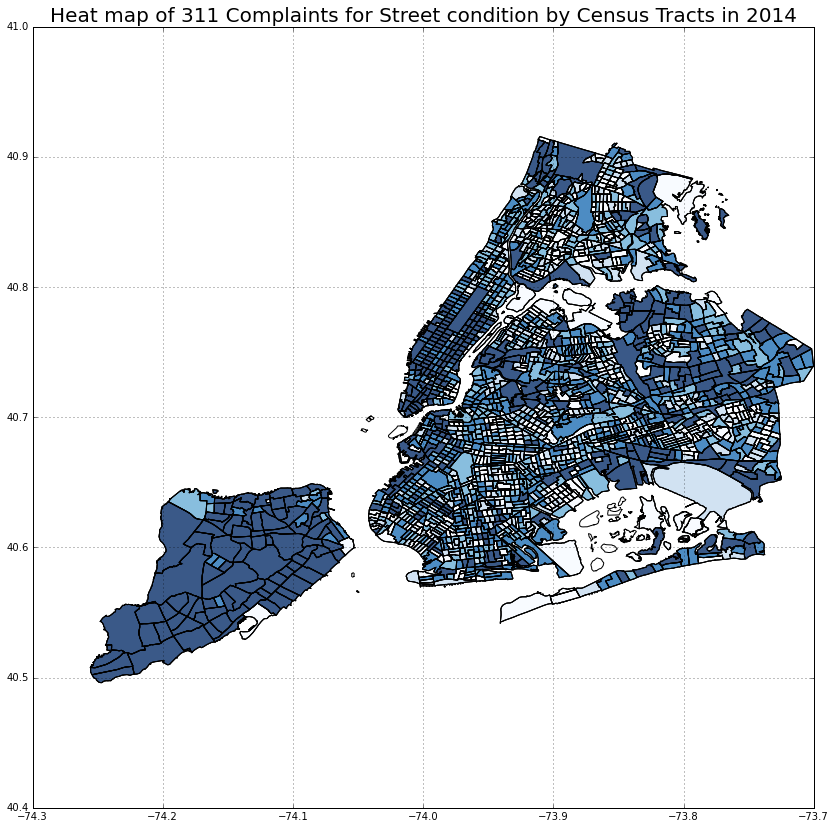

In [148]:
plt.figure(figsize = (14,25))
geotopsc.plot(column='Count', alpha=0.8, scheme = 'QUANTILES', colormap='Blues')
tracts.plot(alpha=0)
plt.title("Heat map of 311 Complaints for Street condition by Census Tracts in 2014", fontsize=20)
plt.grid()

In [157]:
mergedbd = merged[merged['Complaint Type']=='Blocked Driveway']

In [158]:
topbd = pd.DataFrame(mergedbd['Complaint Type'].groupby(mergedbd['BoroCT2010']).value_counts()).reset_index()

In [159]:
topbd.columns = [['BoroCT2010', 'Complaint Type', 'Count']]

In [160]:
geotobd = pd.merge(tracts, topbd, on='BoroCT2010')

In [162]:
geotobd.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,Complaint Type,Count
0,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2497009.69813,7729.016794,POLYGON ((-74.07920577013246 40.64343078374567...,Blocked Driveway,27
1,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4954936.20677,10582.855371,POLYGON ((-74.11618948681574 40.62894119692049...,Blocked Driveway,23
2,5007400,5,Staten Island,I,007400,74,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5788237.74119,9902.948235,"POLYGON ((-74.05974734759452 40.5938486115672,...",Blocked Driveway,34
3,1003200,1,Manhattan,I,003200,32,MN22,East Village,3809,2334190.23228,6358.386684,POLYGON ((-73.97990650235906 40.72686577300234...,Blocked Driveway,22
4,1009600,1,Manhattan,E,009600,96,MN17,Midtown-Midtown South,3807,1887288.40108,5737.356247,POLYGON ((-73.97765482727571 40.75791142377998...,Blocked Driveway,9


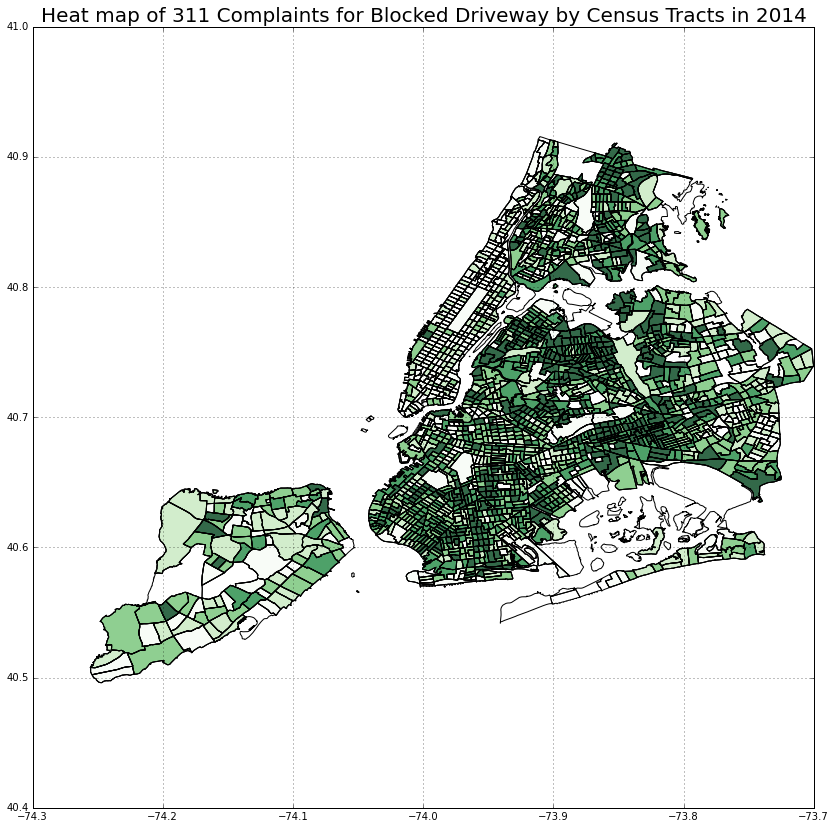

In [164]:
plt.figure(figsize = (14,25))
geotobd.plot(column='Count', alpha=0.8, scheme = 'QUANTILES', colormap='Greens')
tracts.plot(alpha=0)
plt.title("Heat map of 311 Complaints for Blocked Driveway by Census Tracts in 2014", fontsize=20)
plt.grid()